## Unemployment analysis using FRED's API 

In [73]:
# Installing FRED API
#!pip install fredapi;

### Importing libraries

In [74]:
# Standard libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
# FRED API
from fredapi import Fred
# Graphing style
#plt.style.use('seaborn-colorblind')
plt.style.use('fivethirtyeight')
# Show all columns in pandas
pd.set_option('max_columns', 500)
# Importing color pallete from the theme used
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
# Importing fred API key
path = 'C:\\Users\\kevmi\\OneDrive\\Documentos\\Github Proyects\\API Keys\\FRED\\fred_api_key.txt'
with open(path, 'r') as f:
    lines = f.readlines()
fred_key = lines[0]

print('Import complete')

Import complete


### 1. Creating FRED object

In [75]:
fred = Fred(api_key=fred_key)
fred

### 2. Exploring economic data available

In [76]:
series = []

Unemployment results

In [77]:
unrate_search = fred.search('Unemployment', order_by='popularity')
series.append('UNRATE')
unrate_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAUCSL,CPIAUCSL,2022-08-12,2022-08-12,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2022-07-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2022-08-10 07:38:02-05:00,94,The Consumer Price Index for All Urban Consume...
UNRATE,UNRATE,2022-08-12,2022-08-12,Unemployment Rate,1948-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-05 07:44:02-05:00,92,The unemployment rate represents the number of...
PAYEMS,PAYEMS,2022-08-12,2022-08-12,"All Employees, Total Nonfarm",1939-01-01,2022-07-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2022-08-05 07:45:02-05:00,83,"All Employees: Total Nonfarm, commonly known a..."
ICSA,ICSA,2022-08-12,2022-08-12,Initial Claims,1967-01-07,2022-08-06,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2022-08-11 07:33:01-05:00,81,An initial claim is a claim filed by an unempl...
CES0500000003,CES0500000003,2022-08-12,2022-08-12,"Average Hourly Earnings of All Employees, Tota...",2006-03-01,2022-07-01,Monthly,M,Dollars per Hour,$ per Hour,Seasonally Adjusted,SA,2022-08-05 07:45:02-05:00,77,The series comes from the 'Current Employment ...


Industrial Production results

In [78]:
indprod_search = fred.search('Industrial production', order_by='popularity')
series.append('INDPRO')
indprod_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
INDPRO,INDPRO,2022-08-12,2022-08-12,Industrial Production: Total Index,1919-01-01,2022-06-01,Monthly,M,Index 2017=100,Index 2017=100,Seasonally Adjusted,SA,2022-07-15 08:33:27-05:00,79,The Industrial Production Index (INDPRO) is an...
RECPROUSM156N,RECPROUSM156N,2022-08-12,2022-08-12,Smoothed U.S. Recession Probabilities,1967-06-01,2022-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-08-01 07:02:03-05:00,77,Smoothed recession probabilities for the Unite...
PCU32733273,PCU32733273,2022-08-12,2022-08-12,Producer Price Index by Industry: Cement and C...,2003-12-01,2022-07-01,Monthly,M,Index Dec 2003=100,Index Dec 2003=100,Not Seasonally Adjusted,NSA,2022-08-11 07:55:02-05:00,68,None
TCU,TCU,2022-08-12,2022-08-12,Capacity Utilization: Total Index,1967-01-01,2022-06-01,Monthly,M,Percent of Capacity,% of Capacity,Seasonally Adjusted,SA,2022-07-15 08:31:05-05:00,66,Capacity Utilization: Total Industry (TCU) is ...
AHETPI,AHETPI,2022-08-12,2022-08-12,Average Hourly Earnings of Production and Nons...,1964-01-01,2022-07-01,Monthly,M,Dollars per Hour,$ per Hour,Seasonally Adjusted,SA,2022-08-05 07:45:03-05:00,65,Production and related employees include worki...


In [79]:
housing_search = fred.search('housing starts', order_by='popularity')
series.append('HOUST1F')
housing_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
HOUST,HOUST,2022-08-12,2022-08-12,New Privately-Owned Housing Units Started: Tot...,1959-01-01,2022-06-01,Monthly,M,Thousands of Units,Thous. of Units,Seasonally Adjusted Annual Rate,SAAR,2022-07-19 07:31:02-05:00,79,"As provided by the Census, start occurs when e..."
PERMIT,PERMIT,2022-08-12,2022-08-12,New Privately-Owned Housing Units Authorized i...,1960-01-01,2022-06-01,Monthly,M,Thousands of Units,Thous. of Units,Seasonally Adjusted Annual Rate,SAAR,2022-07-26 07:03:02-05:00,70,"Starting with the 2005-02-16 release, the seri..."
HOUST1F,HOUST1F,2022-08-12,2022-08-12,New Privately-Owned Housing Units Started: Sin...,1959-01-01,2022-06-01,Monthly,M,Thousands of Units,Thous. of Units,Seasonally Adjusted Annual Rate,SAAR,2022-07-19 07:31:13-05:00,63,None
ATNHPIUS06037A,ATNHPIUS06037A,2022-08-12,2022-08-12,All-Transactions House Price Index for Los Ang...,1975-01-01,2021-01-01,Annual,A,Index 2000=100,Index 2000=100,Not Seasonally Adjusted,NSA,2022-03-29 09:02:03-05:00,55,"As stated by the source, these annual county i..."
HOUST5F,HOUST5F,2022-08-12,2022-08-12,New Privately-Owned Housing Units Started: Uni...,1959-01-01,2022-06-01,Monthly,M,Thousands of Units,Thous. of Units,Seasonally Adjusted Annual Rate,SAAR,2022-07-19 07:31:15-05:00,48,"From January 1959 until July 1963, the 5 units..."


In [135]:
count = 0
while True:
    for i in housing_search.index:
        if count >= 8: 
            break
        print('*', str(count), housing_search.loc[i]['id'],'||', housing_search.loc[i]['title'], '||', 
                housing_search.loc[i]['frequency_short'], '||', housing_search.loc[i]['units_short'], '\n')
        count+=1
    if count >= 8:
        break

* 0 HOUST || New Privately-Owned Housing Units Started: Total Units || M || Thous. of Units 

* 1 PERMIT || New Privately-Owned Housing Units Authorized in Permit-Issuing Places: Total Units || M || Thous. of Units 

* 2 HOUST1F || New Privately-Owned Housing Units Started: Single-Family Units || M || Thous. of Units 

* 3 ATNHPIUS06037A || All-Transactions House Price Index for Los Angeles County, CA || A || Index 2000=100 

* 4 HOUST5F || New Privately-Owned Housing Units Started: Units in Buildings with 5 Units or More || M || Thous. of Units 

* 5 PERMIT1 || New Privately-Owned Housing Units Authorized in Permit-Issuing Places: Single-Family Units || M || Thous. of Units 

* 6 ATNHPIUS06059A || All-Transactions House Price Index for Orange County, CA || A || Index 2000=100 

* 7 HOUSTNSA || New Privately-Owned Housing Units Started: Total Units || M || Thous. of Units 



In [80]:
housing_search.loc['HOUST1F']['title']

'New Privately-Owned Housing Units Started: Single-Family Units'

In [81]:
retail_search = fred.search('retail sales', order_by='popularity')
series.append('RRSFS')
retail_search.head(7)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAUCSL,CPIAUCSL,2022-08-12,2022-08-12,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2022-07-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2022-08-10 07:38:02-05:00,94,The Consumer Price Index for All Urban Consume...
TOTALSA,TOTALSA,2022-08-12,2022-08-12,Total Vehicle Sales,1976-01-01,2022-07-01,Monthly,M,Millions of Units,Mil. of Units,Seasonally Adjusted Annual Rate,SAAR,2022-08-05 13:18:02-05:00,75,None
RSXFS,RSXFS,2022-08-12,2022-08-12,Advance Retail Sales: Retail Trade,1992-01-01,2022-06-01,Monthly,M,Millions of Dollars,Mil. of $,Seasonally Adjusted,SA,2022-07-15 07:34:01-05:00,71,E-commerce sales are included in the total mon...
RETAILIRSA,RETAILIRSA,2022-08-12,2022-08-12,Retailers: Inventories to Sales Ratio,1992-01-01,2022-05-01,"Monthly, End of Period",M,Ratio,Ratio,Seasonally Adjusted,SA,2022-07-15 09:01:01-05:00,68,The inventories to sales ratios show the relat...
ECOMPCTSA,ECOMPCTSA,2022-08-12,2022-08-12,E-Commerce Retail Sales as a Percent of Total ...,1999-10-01,2022-01-01,Quarterly,Q,Percent,%,Seasonally Adjusted,SA,2022-05-19 09:16:02-05:00,64,E-commerce sales are sales of goods and servic...
HTRUCKSSAAR,HTRUCKSSAAR,2022-08-12,2022-08-12,Motor Vehicle Retail Sales: Heavy Weight Trucks,1967-01-01,2022-07-01,Monthly,M,Millions of Units,Mil. of Units,Seasonally Adjusted Annual Rate,SAAR,2022-08-05 13:18:05-05:00,62,"Heavy trucks are trucks with more than 14,000 ..."
RRSFS,RRSFS,2022-08-12,2022-08-12,Advance Real Retail and Food Services Sales,1992-01-01,2022-06-01,Monthly,M,Millions of 1982-84 CPI Adjusted Dollars,Mil. of 1982-84 CPI Adjusted $,Seasonally Adjusted,SA,2022-07-15 07:39:04-05:00,61,The data in this series are calculated using t...


In [82]:
retail_search.loc['RRSFS']['title']

'Advance Real Retail and Food Services Sales'

#### 2.1 Extracting relevant data

Function to extract dataframes

In [93]:
def get_series(series_names):
    datasets = {}
    # Generating dictionary 
    for name in series_names:
        frame = fred.get_series(series_id=name)
        datasets['df_'+str(name).lower()] = frame

        
    return datasets


Running function

In [94]:
datasets = get_series(series)
datasets.keys()

dict_keys(['df_unrate', 'df_indpro', 'df_houst1f', 'df_rrsfs'])

Creaitng dataframes

In [105]:
df_unrate = pd.DataFrame(datasets['df_unrate'], columns=['unemployment_rate'])
df_indpro = pd.DataFrame(datasets['df_indpro'], columns=['industrial_production'])
df_houst = pd.DataFrame(datasets['df_houst1f'], columns=['housing_starts'])
df_retail = pd.DataFrame(datasets['df_rrsfs'], columns=['retail_sales'])

In [107]:
df_indpro.head()

,industrial_production
1919-01-01,4.8773
1919-02-01,4.6617
1919-03-01,4.5270
1919-04-01,4.6078
1919-05-01,4.6348


<AxesSubplot:title={'center':'Unemployment rate'}>

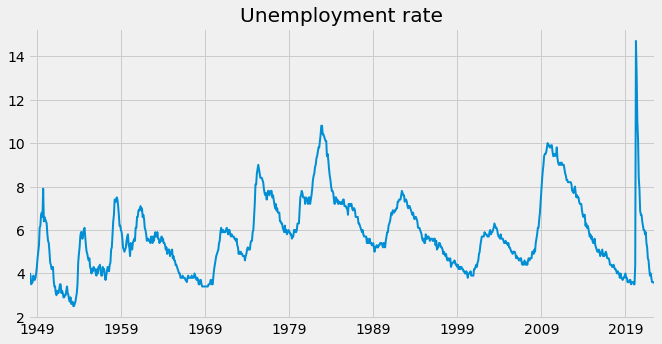

In [84]:
unrate = fred.get_series(series_id='UNRATE')
unrate.plot(figsize=(10,5), 
            title='Unemployment rate', lw=2)